# <b> <center> Investigate Hotel Business using Data Visualization </center> </b>

In [1]:
# import library

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.21.5
pandas version :  1.4.2
seaborn version :  0.11.2


In [2]:
# Matplotlib Default Parameter

from matplotlib import rcParams
plt.style.use('fivethirtyeight')
plt.rcParams['axes.prop_cycle'] = plt.rcParamsDefault['axes.prop_cycle']

# Load Dataset

In [3]:
df = pd.read_csv('hotel_bookings_data.csv')
pd.set_option('display.max_columns', None)
df.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
105780,City Hotel,0,35,2019,April,6,11,2,2,2,0.0,0,Breakfast,Kabupaten Bandung,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,83.30,0,1,Check-Out
74108,City Hotel,1,328,2017,November,37,10,0,2,2,0.0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,1,0,0,Non Refund,1.0,NaN,0,Contract,62.00,0,0,Canceled
70630,City Hotel,1,167,2019,August,25,19,1,5,3,0.0,0,Dinner,Kabupaten Belitung,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,189.00,0,0,Canceled
7240,Resort Hotel,1,187,2018,September,31,30,2,5,2,0.0,0,Full Board,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,173.79,0,0,Canceled
87660,City Hotel,0,8,2018,June,17,21,0,3,2,1.0,0,Breakfast,Kabupaten Kepulauan Seribu,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,220.00,0,2,Check-Out
15883,Resort Hotel,0,1,2017,October,32,5,0,1,2,0.0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,154.80,0,1,Check-Out
41728,City Hotel,0,3,2017,October,34,22,2,1,1,0.0,0,Dinner,Kota Denpasar,Groups,TA/TO,0,0,0,0,No Deposit,1.0,NaN,0,Family,63.00,0,0,Check-Out
99053,City Hotel,0,50,2018,February,51,13,0,2,1,0.0,0,Breakfast,Kota Surabaya,Offline TA/TO,Direct,1,0,2,0,No Deposit,85.0,NaN,0,Personal,67.50,0,1,Check-Out
106036,City Hotel,0,61,2019,April,7,16,0,3,2,1.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,122.40,0,2,Check-Out
88412,City Hotel,0,88,2018,July,19,3,0,3,2,0.0,0,Dinner,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,3.0,NaN,0,Family,117.00,0,1,Check-Out


In [4]:
print('Total Rows :', df.shape[0])
print('Total Features :', df.shape[1])

Total Rows : 119390
Total Features : 29


# Exploratory Data Analysis

## 1.. Descriptive analysis

### A. Check Data Types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
# Grouping Features Based on Their Data Type

nums = df.select_dtypes(include=[np.number], exclude=[np.bool]).columns #numerical features
cats = df.select_dtypes(exclude=[np.number]).columns #categorical features

In [7]:
print(nums)
print (cats)

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_weekdays_nights', 'adults',
       'children', 'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')
Index(['hotel', 'arrival_date_month', 'meal', 'city', 'market_segment',
       'distribution_channel', 'deposit_type', 'customer_type',
       'reservation_status'],
      dtype='object')


### Numerical columns statistics

In [8]:
# statistical summary of numerical columns

df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2018.156554,0.707476,2017.00,2018.00,2018.000,2019.0,2019.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_weekdays_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


### Categorical columns statistics

In [9]:
# statistical summary of categorical columns

df[cats].describe()

,hotel,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,3,4,3
top,City Hotel,October,Breakfast,Kota Denpasar,Online TA,TA/TO,No Deposit,Personal,Check-Out
freq,79330,13877,92310,48590,56477,97870,104641,89613,75166


In [10]:
# check number of unique values

df[cats].nunique()

hotel                     2
arrival_date_month       12
meal                      5
city                    177
market_segment            8
distribution_channel      5
deposit_type              3
customer_type             4
reservation_status        3
dtype: int64

### 2. Check Missing Values

In [11]:
# check missing value

df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [12]:
# melihat persentase missing value masing2 kolom

missing_value = df.isna().sum() *100/len(df)
print(round(missing_value, 4).sort_values(ascending=False))

company                           94.3069
agent                             13.6862
city                               0.4087
children                           0.0034
hotel                              0.0000
is_repeated_guest                  0.0000
total_of_special_requests          0.0000
required_car_parking_spaces        0.0000
adr                                0.0000
customer_type                      0.0000
days_in_waiting_list               0.0000
deposit_type                       0.0000
booking_changes                    0.0000
previous_bookings_not_canceled     0.0000
previous_cancellations             0.0000
market_segment                     0.0000
distribution_channel               0.0000
is_canceled                        0.0000
meal                               0.0000
babies                             0.0000
adults                             0.0000
stays_in_weekdays_nights           0.0000
stays_in_weekend_nights            0.0000
arrival_date_day_of_month         

feature 'COMPANY' punya persentase missing value yang sangat besar.

### 3. Check Duplicated Rows

In [13]:
df.duplicated().sum()

33261

In [14]:
df.duplicated().any()

True

### 4. Summary

In [15]:
# Create summry data Info
list = []

for col in df.columns:
    list.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique()])
df_summary = pd.DataFrame(data=list, columns=['feature', 'data_type', 'null_num','%null','nunique'])
df_summary

,feature,data_type,null_num,%null,nunique
0,hotel,object,0,0.000000,2
1,is_canceled,int64,0,0.000000,2
2,lead_time,int64,0,0.000000,479
3,arrival_date_year,int64,0,0.000000,3
4,arrival_date_month,object,0,0.000000,12
5,arrival_date_week_number,int64,0,0.000000,53
6,arrival_date_day_of_month,int64,0,0.000000,31
7,stays_in_weekend_nights,int64,0,0.000000,17
8,stays_in_weekdays_nights,int64,0,0.000000,35
9,adults,int64,0,0.000000,14


## B. Univariate Analysis

### 1. Boxplot and Violin Plot

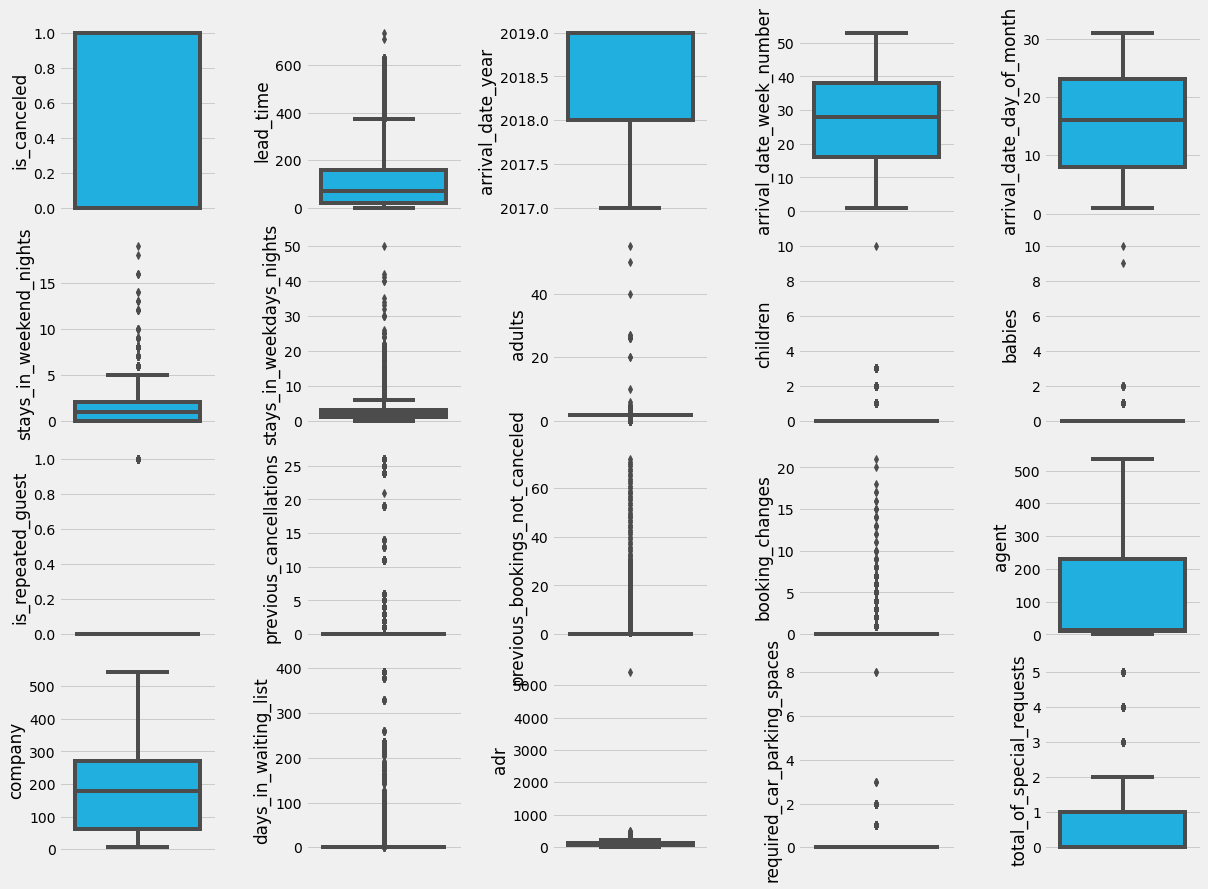

In [16]:
plt.figure(figsize = (17,12))
for i in range(0, len(nums)):
    plt.subplot(4, 5, i+1)
    sns.boxplot(y = df[nums[i]], orient='v', color = 'deepskyblue')
    plt.tight_layout()

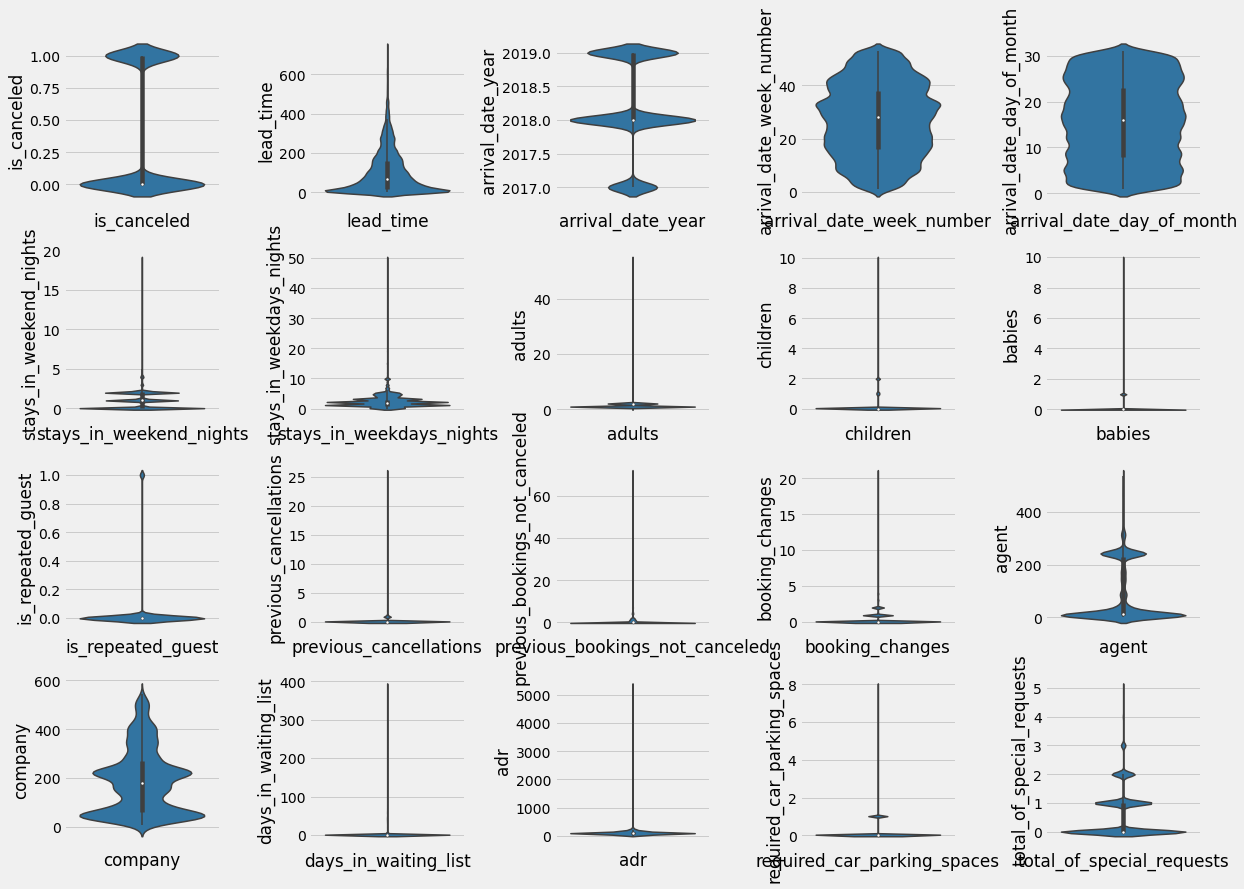

In [17]:
# Create violinplot for numeric feature

plt.figure(figsize=(17,12))
for i in range(0, len(nums)):
    plt.subplot(4, 5, i+1)
    sns.violinplot(y=df[nums[i]], linewidth=1.5)
    plt.xlabel(nums[i])
    plt.tight_layout()

### 2. Distribution Plot

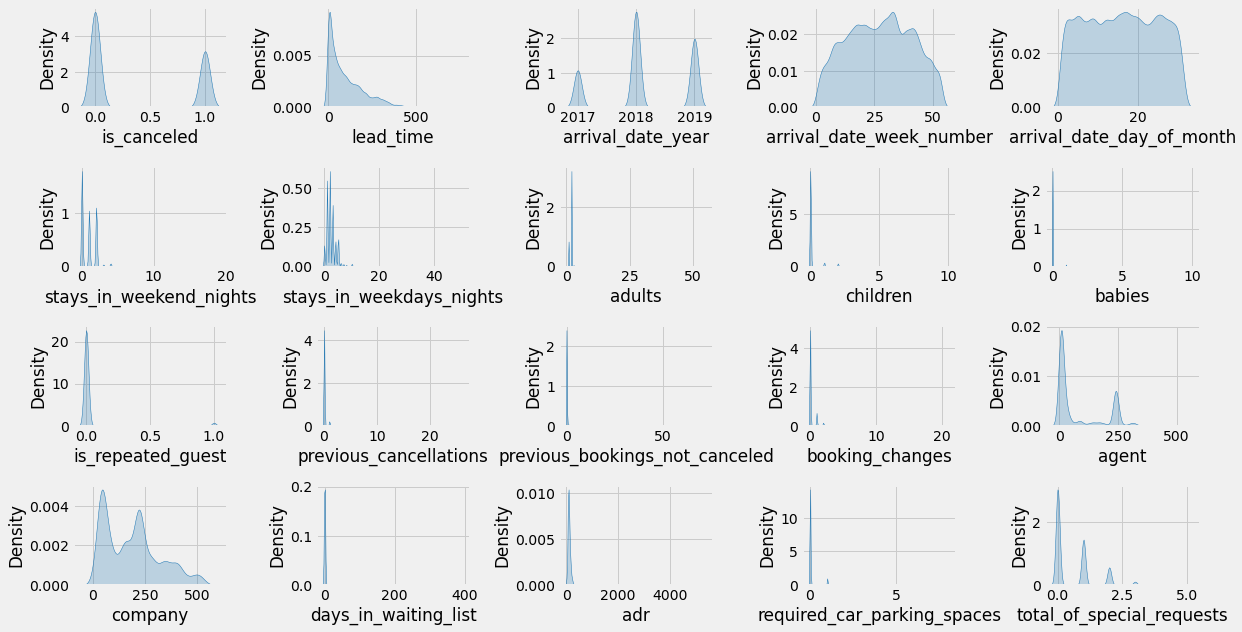

In [18]:
plt.figure(figsize=(17,9))
for i in range(0, len(nums)):
    plt.subplot(4,5, i+1)
    sns.kdeplot(data=df, x=df[nums[i]], fill='True')
    plt.tight_layout()

### 3. Countplot

In [19]:
df[cats].columns

Index(['hotel', 'arrival_date_month', 'meal', 'city', 'market_segment',
       'distribution_channel', 'deposit_type', 'customer_type',
       'reservation_status'],
      dtype='object')

In [20]:
for i in cats:
    print (df[i].value_counts())
    print(' ')

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64
 
October      13877
September    12661
July         11791
December     11160
June         11089
August       10939
November     10508
May           9794
April         8068
January       6794
February      6780
March         5929
Name: arrival_date_month, dtype: int64
 
Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64
 
Kota Denpasar              48590
Kabupaten Bangka           12129
Kota Yogyakarta            10415
Kota Batu                   8568
Kabupaten Bandung           7287
                           ...  
Kabupaten Malang               1
Kabupaten Bekasi               1
Kabupaten Barito Kuala         1
Kota Palembang                 1
Kabupaten Maluku Tengah        1
Name: city, Length: 177, dtype: int64
 
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary 

In [21]:
df[cats].nunique()

hotel                     2
arrival_date_month       12
meal                      5
city                    177
market_segment            8
distribution_channel      5
deposit_type              3
customer_type             4
reservation_status        3
dtype: int64

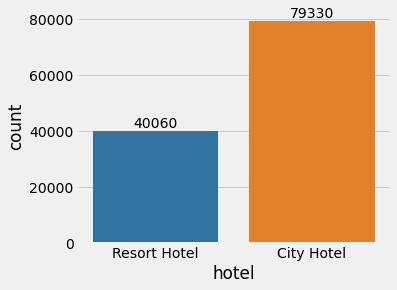

In [22]:
plt.figure(figsize=(5,4))
ax = sns.countplot(x=df["hotel"])

for patch in ax.patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    ax.text(x.mean(), y, f"{y:.0f}", ha="center", va="bottom")

# Show plot
plt.show()

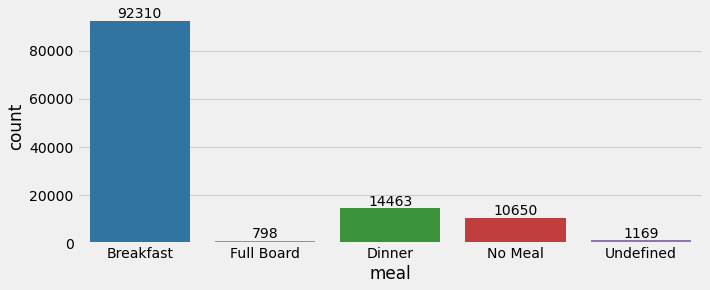

In [23]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x=df["meal"])

for patch in ax.patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    ax.text(x.mean(), y, f"{y:.0f}", ha="center", va="bottom")


# Show plot
plt.show()

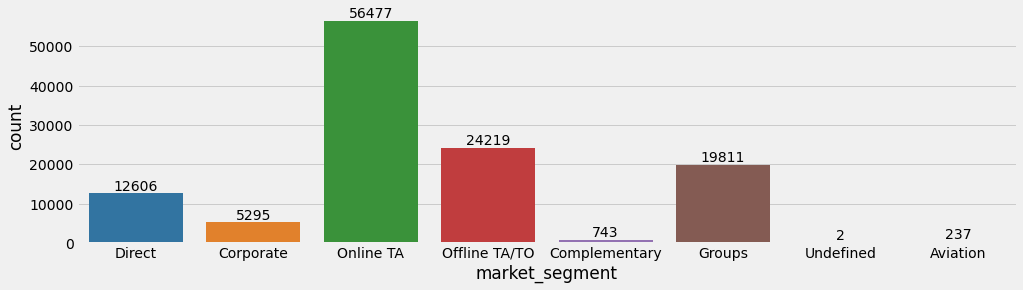

In [24]:
plt.figure(figsize=(15,4))
ax = sns.countplot(x=df["market_segment"])

for patch in ax.patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    ax.text(x.mean(), y, f"{y:.0f}", ha="center", va="bottom")


# Show plot
plt.show()

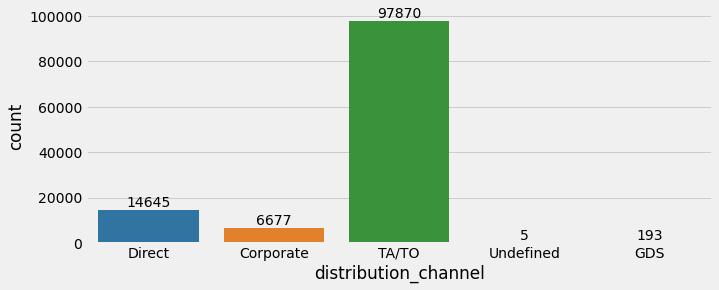

In [25]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x=df["distribution_channel"])

for patch in ax.patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    ax.text(x.mean(), y, f"{y:.0f}", ha="center", va="bottom")


# Show plot
plt.show()

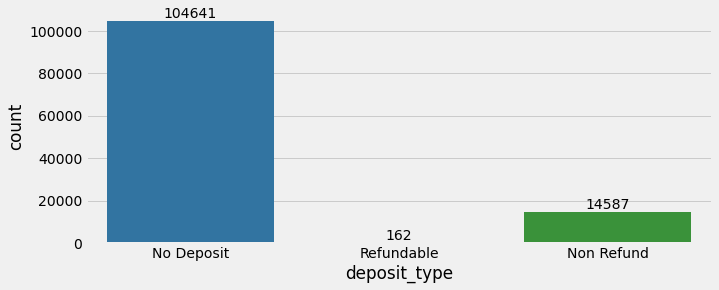

In [26]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x=df["deposit_type"])

for patch in ax.patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    ax.text(x.mean(), y, f"{y:.0f}", ha="center", va="bottom")


# Show plot
plt.show()

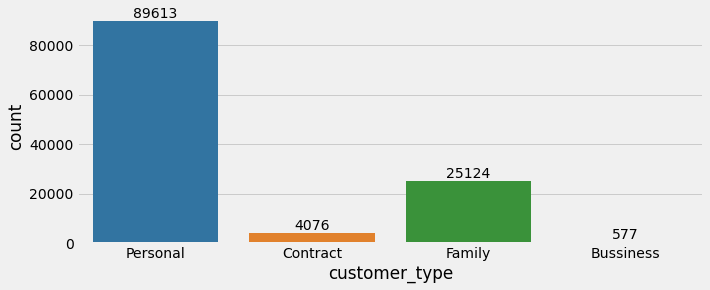

In [27]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x=df["customer_type"])

for patch in ax.patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    ax.text(x.mean(), y, f"{y:.0f}", ha="center", va="bottom")


# Show plot
plt.show()

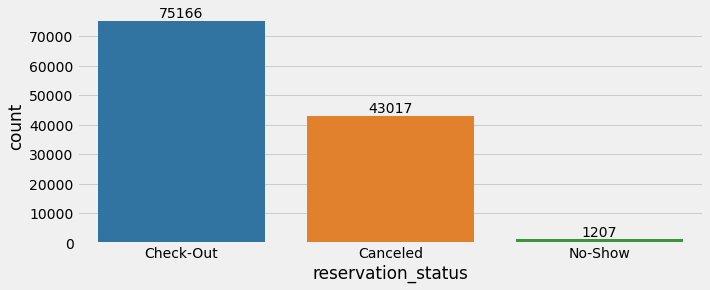

In [28]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x=df["reservation_status"])

for patch in ax.patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    ax.text(x.mean(), y, f"{y:.0f}", ha="center", va="bottom")


# Show plot
plt.show()

## C. Multivariate Analysis

<AxesSubplot:>

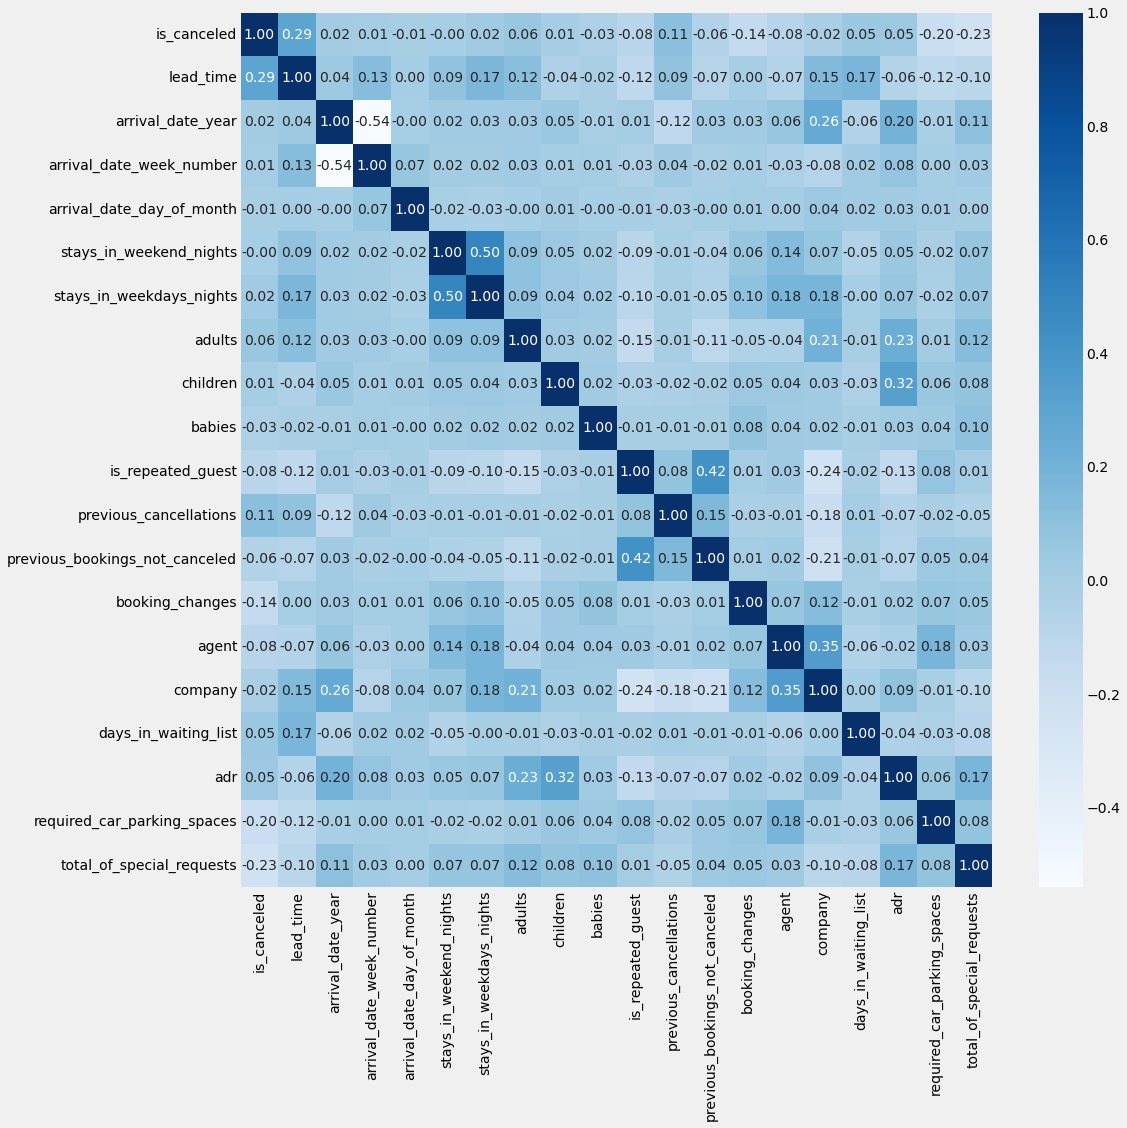

In [29]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

# DATA PRE-PROCESSING

## 1. Missing Values Handling

In [30]:
# melihat persentase missing value masing2 kolom

missing_value = df.isna().sum() *100/len(df)
print(round(missing_value, 4).sort_values(ascending=False))

company                           94.3069
agent                             13.6862
city                               0.4087
children                           0.0034
hotel                              0.0000
is_repeated_guest                  0.0000
total_of_special_requests          0.0000
required_car_parking_spaces        0.0000
adr                                0.0000
customer_type                      0.0000
days_in_waiting_list               0.0000
deposit_type                       0.0000
booking_changes                    0.0000
previous_bookings_not_canceled     0.0000
previous_cancellations             0.0000
market_segment                     0.0000
distribution_channel               0.0000
is_canceled                        0.0000
meal                               0.0000
babies                             0.0000
adults                             0.0000
stays_in_weekdays_nights           0.0000
stays_in_weekend_nights            0.0000
arrival_date_day_of_month         

Terdapat missing values pada kolom
1. `company` (object) 112593 null -> remove feature krn terlalu banyak null.
2. `agent` (object) 16340 null -> isi dengan 0, karena kemungkinan yang null adalah yg book tanpa menggunakan agent.
3. `city` (object) 488 null -> isi dengan 'unknown'.
4. `children` (int) 4 null -> isi dengan 0, karena kemungkinan memang tidak membawa children.

In [31]:
# hapus kolom company karena sebagian besar null

df.drop(columns=['company'], axis=1, inplace=True)

In [32]:
# isi kolom agent ddengan 0 dan city dengan unknown

df['city'] = df['city'].fillna('Unknown')
df['agent'] = df['agent'].fillna(0)
df['children'] = df['children'].fillna(df['children'].median())

In [35]:
# cek

df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

Sudah tidak ada missing value

## 2. Dropping duplicated rows

In [36]:
df.duplicated().any()

True

In [37]:
df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
5,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0,Personal,98.00,0,1,Check-Out
22,Resort Hotel,0,72,2017,September,27,1,2,4,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,1,No Deposit,250.0,0,Personal,84.67,0,1,Check-Out
43,Resort Hotel,0,70,2017,September,27,2,2,3,2,0.0,0,Dinner,Kabupaten Tangerang,Direct,Direct,0,0,0,0,No Deposit,250.0,0,Personal,137.00,0,1,Check-Out
138,Resort Hotel,1,5,2017,September,28,5,1,0,2,0.0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0,Personal,97.00,0,0,Canceled
200,Resort Hotel,0,0,2017,September,28,7,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0,Personal,109.80,0,3,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2019,October,35,31,0,3,2,0.0,0,Breakfast,Kabupaten Bandung,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0,Personal,126.00,0,2,Check-Out
119352,City Hotel,0,63,2019,October,35,31,0,3,3,0.0,0,Breakfast,Kota Surabaya,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0,Family,195.33,0,2,Check-Out
119353,City Hotel,0,63,2019,October,35,31,0,3,3,0.0,0,Breakfast,Kota Surabaya,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0,Family,195.33,0,2,Check-Out
119354,City Hotel,0,63,2019,October,35,31,0,3,3,0.0,0,Breakfast,Kota Surabaya,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0,Family,195.33,0,2,Check-Out


Ada 33272 baris yang duplikat.

## 3. Correcting invalid values

### a. kolom meal

In [38]:
# cek kolom meal

df['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64

kita ubah kolom undefined menjadi no meal

In [39]:
# Mengganti semua nilai 'undefined' menjadi "no meal"

df["meal"] = df["meal"].replace('Undefined', 'No Meal')

In [40]:
# cek lagi kolom meal

df['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       11819
Full Board      798
Name: meal, dtype: int64

### b. kolom jumlah tamu

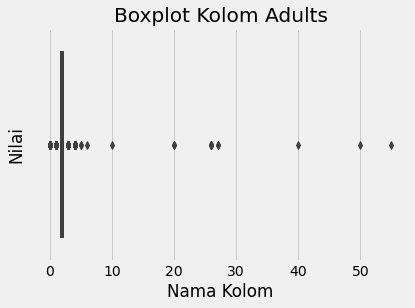

In [42]:
# boxplot adult
sns.boxplot(x=df['adults'])
plt.xlabel('Nama Kolom')
plt.ylabel('Nilai')
plt.title('Boxplot Kolom Adults')
plt.show()

In [43]:
df[df['adults'] ==0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
2224,Resort Hotel,0,1,2017,December,41,6,0,3,0,0.0,0,No Meal,Kota Denpasar,Corporate,Corporate,0,0,0,1,No Deposit,0.0,0,Family,0.00,0,0,Check-Out
2409,Resort Hotel,0,0,2017,December,42,12,0,0,0,0.0,0,No Meal,Kota Denpasar,Corporate,Corporate,0,0,0,0,No Deposit,0.0,0,Personal,0.00,0,0,Check-Out
3181,Resort Hotel,0,36,2017,January,47,20,1,2,0,0.0,0,No Meal,Kota Batu,Groups,TA/TO,0,0,0,0,No Deposit,38.0,0,Family,0.00,0,0,Check-Out
3684,Resort Hotel,0,165,2017,February,53,30,1,4,0,0.0,0,No Meal,Kota Denpasar,Groups,TA/TO,0,0,0,1,No Deposit,308.0,122,Family,0.00,0,0,Check-Out
3708,Resort Hotel,0,165,2017,February,53,30,2,4,0,0.0,0,No Meal,Kota Denpasar,Groups,TA/TO,0,0,0,1,No Deposit,308.0,122,Family,0.00,0,0,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117204,City Hotel,0,296,2019,September,30,27,1,3,0,2.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0,Personal,98.85,0,1,Check-Out
117274,City Hotel,0,276,2019,September,31,30,2,1,0,2.0,0,Breakfast,Kabupaten Bandung,Online TA,TA/TO,0,0,0,1,No Deposit,9.0,0,Personal,93.64,0,2,Check-Out
117303,City Hotel,0,291,2019,September,30,29,2,2,0,2.0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0,Personal,98.85,0,1,Check-Out
117453,City Hotel,0,159,2019,September,31,31,1,3,0,2.0,0,No Meal,Kota Yogyakarta,Online TA,TA/TO,0,0,0,1,No Deposit,9.0,0,Personal,121.88,0,1,Check-Out


In [44]:
## menghapus row dengan kolom adult 0 (karena tidak make sense book hotel tanpa adults

df = df[~(df['adults'] == 0)]

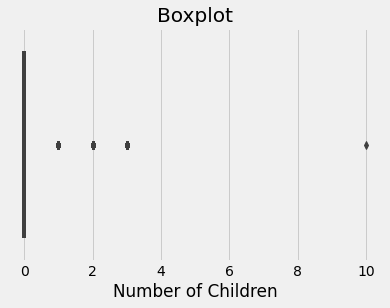

In [45]:
# boxplot children
sns.boxplot(x=df['children'])
plt.xlabel('Number of Children')
plt.title('Boxplot')
plt.show()

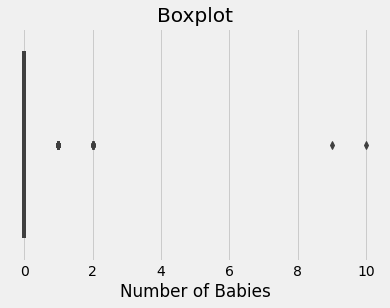

In [46]:
# boxplot babies
sns.boxplot(x=df['babies'])
plt.xlabel('Number of Babies')
plt.title('Boxplot')
plt.show()

In [47]:
# create new column for total stay duration

df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']

In [48]:
# hapus kolom stay duration = 0

df = df[df['stay_duration'] != 0]

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118342 entries, 2 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118342 non-null  object 
 1   is_canceled                     118342 non-null  int64  
 2   lead_time                       118342 non-null  int64  
 3   arrival_date_year               118342 non-null  int64  
 4   arrival_date_month              118342 non-null  object 
 5   arrival_date_week_number        118342 non-null  int64  
 6   arrival_date_day_of_month       118342 non-null  int64  
 7   stays_in_weekend_nights         118342 non-null  int64  
 8   stays_in_weekdays_nights        118342 non-null  int64  
 9   adults                          118342 non-null  int64  
 10  children                        118342 non-null  float64
 11  babies                          118342 non-null  int64  
 12  meal            

In [50]:
df['children'] =  df['children'].astype(int)

In [51]:
# create nwe column for the number of total visitor

df['visitor'] = df['adults'] + df['children'] + df['babies']

## 3. Analysis

### A. Monthly Hotel Booking Analysis Based on Hotel Type

In [52]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,stay_duration,visitor
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0.0,0,Personal,75.00,0,0,Check-Out,1,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0,Personal,75.00,0,0,Check-Out,1,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0,Personal,98.00,0,1,Check-Out,2,2
5,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0,Personal,98.00,0,1,Check-Out,2,2
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,0.0,0,Personal,107.00,0,0,Check-Out,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2019,October,35,30,2,5,2,0,0,Breakfast,Kabupaten Magelang,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,394.0,0,Personal,96.14,0,0,Check-Out,7,2
119386,City Hotel,0,102,2019,October,35,31,2,5,3,0,0,Breakfast,Kota Yogyakarta,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0,Personal,225.43,0,2,Check-Out,7,3
119387,City Hotel,0,34,2019,October,35,31,2,5,2,0,0,Breakfast,Kabupaten Bandung,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0,Personal,157.71,0,4,Check-Out,7,2
119388,City Hotel,0,109,2019,October,35,31,2,5,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,89.0,0,Personal,104.40,0,0,Check-Out,7,2


In [53]:
# cek ada tahun berapa saja 

df['arrival_date_year'].value_counts()

2018    56090
2019    40447
2017    21805
Name: arrival_date_year, dtype: int64

In [55]:
# cek bulan

df['arrival_date_month'].value_counts()

October      13780
September    12553
July         11688
December     11048
June         11024
August       10879
November     10466
May           9699
April         7980
January       6706
February      6666
March         5853
Name: arrival_date_month, dtype: int64

### Q1. Tabel agregat perbandingan jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel (Hint: Perhatikan data tahun kedatangan)

In [62]:
df.groupby(['hotel', 'arrival_date_month', 'arrival_date_year']).agg({'is_canceled':'count'})

is_canceled
hotel        arrival_date_month arrival_date_year             
City Hotel   April              2018                      2334
                                2019                      2565
             August             2018                      3906
                                2019                      3956
             December           2017                      3366
                                2018                      4172
             February           2017                      1628
                                2018                      2446
             January            2017                      1225
                                2018                      3078
             July               2018                      3632
                                2019                      4536
             June               2018                      3541
                                2019                      3896
             March              2018                      1345
                                2019                      2349
             May                2018                      3018
                                2019                      3376
             November           2017                      3516
                                2018                      3850
             October            2017                      2467
                                2018                      3337
                                2019                      3116
             September          2017                      1393
                                2018                      3089
                                2019                      3539
Resort Hotel April              2018                      1509
                                2019                      1572
             August             2018                      1345
                                2019                      1672
             December           2017                      1548
                                2018                      1962
             February           2017                      1239
                                2018                      1353
             January            2017                      1088
                                2018                      1315
             July               2018                      1773
                                2019                      1747
             June               2018                      1848
                                2019                      1739
             March              2018                       866
                                2019                      1293
             May                2018                      1754
                                2019                      1551
             November           2017                      1582
                                2018                      1518
             October            2017                      1392
                                2018                      1672
                                2019                      1796
             September          2017                      1361
                                2018                      1427
                                2019                      1744

In [63]:
# simpan table agregasi
df_monthly = df.groupby(['hotel','arrival_date_month', 'arrival_date_year']).agg({'is_canceled' : 'count'}).reset_index()

In [65]:
# Membuat dictionary yang menyimpan pasangan nama bulan dan angka
month = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6,
         'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}

# Menggunakan dictionary untuk mengkonversi nama bulan ke dalam bentuk angka
df_monthly['month_num'] = df_monthly['arrival_date_month'].map(month)

# Mengurutkan dataframe berdasarkan kolom month_num
df_monthly = df_monthly.sort_values(by='month_num')

# Drop kolom month num
df_monthly = df_monthly.drop('month_num', axis =1)
df_monthly

,hotel,arrival_date_month,arrival_date_year,is_canceled
34,Resort Hotel,January,2017,1088
35,Resort Hotel,January,2018,1315
8,City Hotel,January,2017,1225
9,City Hotel,January,2018,3078
32,Resort Hotel,February,2017,1239
6,City Hotel,February,2017,1628
7,City Hotel,February,2018,2446
33,Resort Hotel,February,2018,1353
40,Resort Hotel,March,2018,866
41,Resort Hotel,March,2019,1293


In [74]:
#lihat berapa tahun yang direcord pada masing masing tahun dan bulan
df_monthly_year = df_monthly.groupby(['hotel', 'arrival_date_month']).agg({'arrival_date_year':'count'})
df_monthly= df_monthly.merge(df_monthly_year, on = ['hotel', 'arrival_date_month'])
df_monthly.rename(columns={'is_canceled':'total_booking', 'arrival_date_year_x':'arrival_date_year', 'arrival_date_year_y':'year_record'}, inplace=True)

In [76]:
# Drop kolom
df_monthly = df_monthly.drop('ammount_of_year', axis =1)
df_monthly

,hotel,arrival_date_month,arrival_date_year,total_booking,year_record
0,Resort Hotel,January,2017,1088,2
1,Resort Hotel,January,2018,1315,2
2,City Hotel,January,2017,1225,2
3,City Hotel,January,2018,3078,2
4,Resort Hotel,February,2017,1239,2
5,Resort Hotel,February,2018,1353,2
6,City Hotel,February,2017,1628,2
7,City Hotel,February,2018,2446,2
8,Resort Hotel,March,2018,866,2
9,Resort Hotel,March,2019,1293,2


In [79]:
#Create total of booking per hotel and month

df_monthly_totalbook = df_monthly.groupby(['hotel', 'arrival_date_month']).agg({'total_booking':'sum'})
df_monthly_totalbook.rename(columns={'total_booking':'sum_booking'}, inplace=True)
df_monthly = df_monthly.merge(df_monthly_totalbook, on=['hotel', 'arrival_date_month'])

In [81]:
# Drop kolom
df_monthly = df_monthly.drop('sum_booking_y', axis =1)
df_monthly.rename(columns={'sum_booking_x':'sum_booking'}, inplace=True)
df_monthly

,hotel,arrival_date_month,arrival_date_year,total_booking,year_record,sum_booking
0,Resort Hotel,January,2017,1088,2,2403
1,Resort Hotel,January,2018,1315,2,2403
2,City Hotel,January,2017,1225,2,4303
3,City Hotel,January,2018,3078,2,4303
4,Resort Hotel,February,2017,1239,2,2592
5,Resort Hotel,February,2018,1353,2,2592
6,City Hotel,February,2017,1628,2,4074
7,City Hotel,February,2018,2446,2,4074
8,Resort Hotel,March,2018,866,2,2159
9,Resort Hotel,March,2019,1293,2,2159


In [83]:
#create average num booking per hotel, month and year
df_monthly['avg_num_booking'] = round(df_monthly['sum_booking']/df_monthly['year_record'])

In [95]:
#create percentage of booking distrubution per month and hotel
#df_monthly['percentage'] = round((df_monthly['avg_num_booking']/df_monthly.groupby(['hotel', 'arrival_date_month']).agg({'avg_num_booking':'sum'}).reset_index())*100, 2)
#df_monthly

In [84]:
df_monthly

,hotel,arrival_date_month,arrival_date_year,total_booking,year_record,sum_booking,avg_num_booking
0,Resort Hotel,January,2017,1088,2,2403,1202.0
1,Resort Hotel,January,2018,1315,2,2403,1202.0
2,City Hotel,January,2017,1225,2,4303,2152.0
3,City Hotel,January,2018,3078,2,4303,2152.0
4,Resort Hotel,February,2017,1239,2,2592,1296.0
5,Resort Hotel,February,2018,1353,2,2592,1296.0
6,City Hotel,February,2017,1628,2,4074,2037.0
7,City Hotel,February,2018,2446,2,4074,2037.0
8,Resort Hotel,March,2018,866,2,2159,1080.0
9,Resort Hotel,March,2019,1293,2,2159,1080.0


In [86]:
table = pd.pivot_table(data=df_monthly, 
                        index=['arrival_date_month'], 
                        columns=['hotel'], 
                        values='avg_num_booking').reset_index()
table

hotel,arrival_date_month,City Hotel,Resort Hotel
0,April,2450.0,1540.0
1,August,3931.0,1508.0
2,December,3769.0,1755.0
3,February,2037.0,1296.0
4,January,2152.0,1202.0
5,July,4084.0,1760.0
6,June,3718.0,1794.0
7,March,1847.0,1080.0
8,May,3197.0,1652.0
9,November,3683.0,1550.0


In [101]:
table.columns

Index(['arrival_date_month', 'City Hotel', 'Resort Hotel'], dtype='object', name='hotel')

In [87]:
# Membuat dictionary yang menyimpan pasangan nama bulan dan angka
month = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6,
         'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}

# Menggunakan dictionary untuk mengkonversi nama bulan ke dalam bentuk angka
table['month_num'] = table['arrival_date_month'].map(month)

# Mengurutkan dataframe berdasarkan kolom month_num
table = table.sort_values(by='month_num')

table = table.drop('month_num', axis =1)
table

hotel,arrival_date_month,City Hotel,Resort Hotel
4,January,2152.0,1202.0
3,February,2037.0,1296.0
7,March,1847.0,1080.0
0,April,2450.0,1540.0
8,May,3197.0,1652.0
6,June,3718.0,1794.0
5,July,4084.0,1760.0
1,August,3931.0,1508.0
11,September,2674.0,1511.0
10,October,2973.0,1620.0


In [88]:
#selecting important column to create percentage column
df_monthly_final = df_monthly[['hotel', 'arrival_date_month', 'avg_num_booking']]

#there're duplciated data cause by previous processes (multiple value based on year column)
df_monthly_final = df_monthly_final.drop_duplicates()
df_monthly_final

,hotel,arrival_date_month,avg_num_booking
0,Resort Hotel,January,1202.0
2,City Hotel,January,2152.0
4,Resort Hotel,February,1296.0
6,City Hotel,February,2037.0
8,Resort Hotel,March,1080.0
10,City Hotel,March,1847.0
12,City Hotel,April,2450.0
14,Resort Hotel,April,1540.0
16,City Hotel,May,3197.0
18,Resort Hotel,May,1652.0


In [89]:
#summarize total of avg num booking based on hotel type
df_part = df_monthly_final.groupby('hotel').agg({'avg_num_booking':'sum'})
df_part.rename(columns={'avg_num_booking':'total_avg_num_booking'}, inplace=True)
df_part

,total_avg_num_booking
hotel,
City Hotel,36515.0
Resort Hotel,18268.0


In [90]:
df_monthly_final = df_monthly_final.merge(df_part, on='hotel')

In [92]:
df_monthly_final

,hotel,arrival_date_month,avg_num_booking,total_avg_num_booking
0,Resort Hotel,January,1202.0,18268.0
1,Resort Hotel,February,1296.0,18268.0
2,Resort Hotel,March,1080.0,18268.0
3,Resort Hotel,April,1540.0,18268.0
4,Resort Hotel,May,1652.0,18268.0
5,Resort Hotel,June,1794.0,18268.0
6,Resort Hotel,July,1760.0,18268.0
7,Resort Hotel,August,1508.0,18268.0
8,Resort Hotel,September,1511.0,18268.0
9,Resort Hotel,October,1620.0,18268.0


In [94]:
#create percentage column based on avg num booking per hotel type
df_monthly_final['percentage'] = round((df_monthly_final['avg_num_booking']/df_monthly_final['total_avg_num_booking'])*100, 2)
df_monthly_final.sort_values('arrival_date_month', ascending=True)
df_monthly_final

,hotel,arrival_date_month,avg_num_booking,total_avg_num_booking,percentage
0,Resort Hotel,January,1202.0,18268.0,6.58
1,Resort Hotel,February,1296.0,18268.0,7.09
2,Resort Hotel,March,1080.0,18268.0,5.91
3,Resort Hotel,April,1540.0,18268.0,8.43
4,Resort Hotel,May,1652.0,18268.0,9.04
5,Resort Hotel,June,1794.0,18268.0,9.82
6,Resort Hotel,July,1760.0,18268.0,9.63
7,Resort Hotel,August,1508.0,18268.0,8.25
8,Resort Hotel,September,1511.0,18268.0,8.27
9,Resort Hotel,October,1620.0,18268.0,8.87


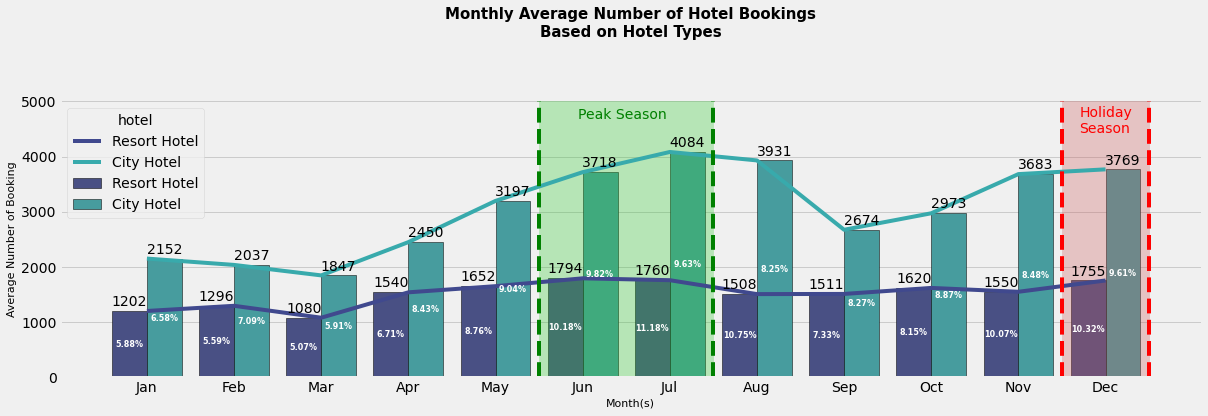

In [130]:
fig, ax = plt.subplots(figsize=(17, 6))
plt.title("Monthly Average Number of Hotel Bookings\nBased on Hotel Types", fontsize=15, color='black', weight='bold', pad=65)
sns.barplot(x='arrival_date_month', y='avg_num_booking', data=df_monthly_final, hue='hotel', edgecolor='black', palette='mako')
sns.lineplot(x='arrival_date_month', y='avg_num_booking', data=df_monthly_final, hue='hotel', palette='mako')

plt.xlabel('Month(s)', fontsize=11)
plt.xticks(np.arange(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Average Number of Booking', fontsize=11)
plt.ylim(0, 5000)

plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

plt.axvline(4.5, ls='--', color='green')
plt.axvline(6.5, ls='--', color='green')
plt.stackplot(np.arange(4.5,7.5), [[5000]], color='limegreen', alpha=0.3)
plt.text(x=4.95, y=4750, s='Peak Season', fontsize=14, color='green', va='center')

plt.axvline(10.5, ls='--', color='red')
plt.axvline(11.5, ls='--', color='red')
plt.stackplot(np.arange(10.5,12.5), [[5000]], color='indianred', alpha=0.3)
plt.text(x=10.7, y=4650, s='Holiday\nSeason', fontsize=14, color='red', va='center')

plt.bar_label(ax.containers[0], ['5.88%', '5.59%', '5.07%', '6.71%', '8.76%', '10.18%', '11.18%', '10.75%', '7.33%', '8.15%', '10.07%', '10.32%'], label_type='center', color='white', weight='bold', fontsize=8)
plt.bar_label(ax.containers[1], ['6.58%', '7.09%', '5.91%', '8.43%', '9.04%', '9.82%', '9.63%', '8.25%', '8.27%', '8.87%', '8.48%', '9.61%'], label_type='center', color='white', weight='bold', fontsize=8)

sns.despine()
plt.tight_layout()
plt.savefig('avg_num_booking.png', dpi=200)

1. June and july are peak season for hotel bookings, this high number could be caused by long semester holiday.
2. City hotel reached highest average number of hotel bookings at 11.18% on july and resort hotel reached 9.82% on june
3. There're another growth on average number of hotel bookings in december for city hotel (10.32%) and resort hotel (9.61%).It could be cause by christmas and new year's eve holiday."

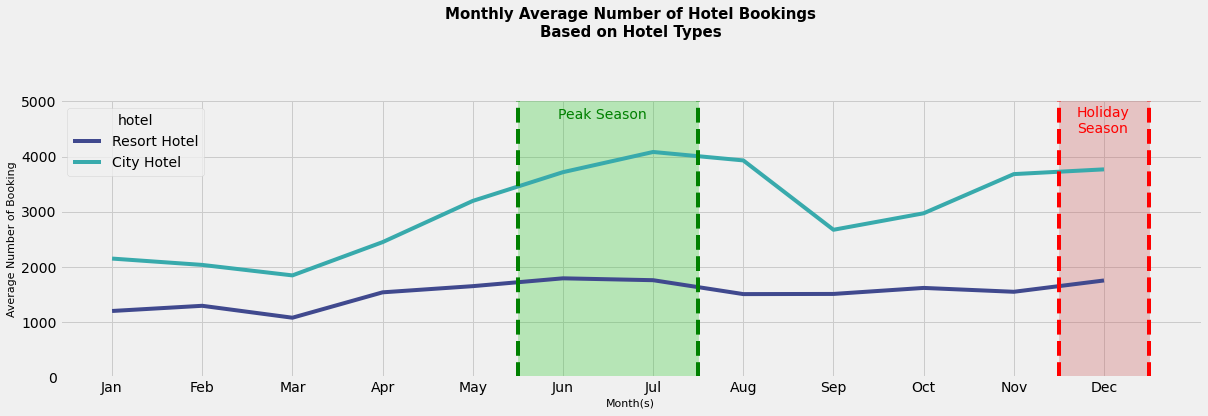

In [98]:
fig, ax = plt.subplots(figsize=(17, 6))
plt.title("Monthly Average Number of Hotel Bookings\nBased on Hotel Types", fontsize=15, color='black', weight='bold', pad=65)
sns.lineplot(x='arrival_date_month', y='avg_num_booking', data=df_monthly_final, hue='hotel', palette='mako')

plt.xlabel('Month(s)', fontsize=11)
plt.xticks(np.arange(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Average Number of Booking', fontsize=11)
plt.ylim(0, 5000)

plt.axvline(4.5, ls='--', color='green')
plt.axvline(6.5, ls='--', color='green')
plt.stackplot(np.arange(4.5,7.5), [[5000]], color='limegreen', alpha=0.3)
plt.text(x=4.95, y=4750, s='Peak Season', fontsize=14, color='green', va='center')

plt.axvline(10.5, ls='--', color='red')
plt.axvline(11.5, ls='--', color='red')
plt.stackplot(np.arange(10.5,12.5), [[5000]], color='indianred', alpha=0.3)
plt.text(x=10.7, y=4650, s='Holiday\nSeason', fontsize=14, color='red', va='center')

sns.despine()
plt.tight_layout()
plt.savefig('avg_num_booking.png', dpi=200)

### B. Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

In [116]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,visitor,stay_duration
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0.0,0,Personal,75.0,0,0,Check-Out,1.0,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0,Personal,75.0,0,0,Check-Out,1.0,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0,Personal,98.0,0,1,Check-Out,2.0,2
5,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0,Personal,98.0,0,1,Check-Out,2.0,2
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,0.0,0,Personal,107.0,0,0,Check-Out,2.0,2


<AxesSubplot:xlabel='stay_duration'>

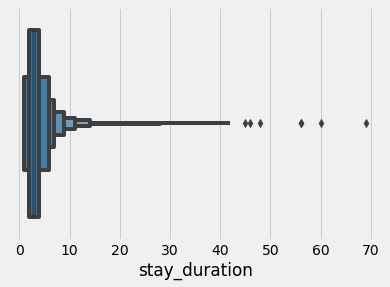

In [120]:
sns.boxenplot(x = df['stay_duration'])

In [101]:
df['stay_duration'].value_counts()

2     27602
3     27008
1     20974
4     17318
7      8639
5      7746
6      3835
8      1152
10     1135
14      913
9       840
11      392
12      220
13      139
15       72
21       71
16       40
25       37
18       35
28       34
19       22
17       20
20       14
22       13
29       13
30       13
23        8
26        6
24        6
35        5
42        4
27        4
33        3
56        2
38        1
48        1
46        1
45        1
69        1
60        1
34        1
Name: stay_duration, dtype: int64

In [103]:
duration_list = []
for i in df['stay_duration']:
    if i >= 1 and i <= 7:
        group = '1 Week'
    elif i >= 8 and i <= 14:
        group = '2 Weeks'
    elif i >= 15 and i <= 21:
        group = '3 Weeks'
    else: 
        group = '4 Weeks'
    duration_list.append(group)
df['stay_duration_group'] = duration_list

In [104]:
df['stay_duration_group'].value_counts()

1 Week     113122
2 Weeks      4791
3 Weeks       274
4 Weeks       155
Name: stay_duration_group, dtype: int64

In [105]:
df_duration = df.groupby(['hotel', 'stay_duration_group', 'is_canceled']).agg({'agent':'count'}).reset_index()
df_duration.rename(columns={'agent':'num_booking'}, inplace=True)

df_duration

,hotel,stay_duration_group,is_canceled,num_booking
0,City Hotel,1 Week,0,45151
1,City Hotel,1 Week,1,32310
2,City Hotel,2 Weeks,0,508
3,City Hotel,2 Weeks,1,555
4,City Hotel,3 Weeks,0,29
5,City Hotel,3 Weeks,1,76
6,City Hotel,4 Weeks,0,6
7,City Hotel,4 Weeks,1,41
8,Resort Hotel,1 Week,0,25754
9,Resort Hotel,1 Week,1,9907


In [106]:
#create sum booking column
df_sum = df_duration.groupby(['hotel', 'stay_duration_group']).agg({'num_booking':'sum'}).reset_index()
df_sum.rename(columns={'num_booking':'sum_booking'}, inplace=True)
df_sum

,hotel,stay_duration_group,sum_booking
0,City Hotel,1 Week,77461
1,City Hotel,2 Weeks,1063
2,City Hotel,3 Weeks,105
3,City Hotel,4 Weeks,47
4,Resort Hotel,1 Week,35661
5,Resort Hotel,2 Weeks,3728
6,Resort Hotel,3 Weeks,169
7,Resort Hotel,4 Weeks,108


In [107]:
df_duration = df_duration.merge(df_sum, on=['hotel', 'stay_duration_group'])
df_duration

,hotel,stay_duration_group,is_canceled,num_booking,sum_booking
0,City Hotel,1 Week,0,45151,77461
1,City Hotel,1 Week,1,32310,77461
2,City Hotel,2 Weeks,0,508,1063
3,City Hotel,2 Weeks,1,555,1063
4,City Hotel,3 Weeks,0,29,105
5,City Hotel,3 Weeks,1,76,105
6,City Hotel,4 Weeks,0,6,47
7,City Hotel,4 Weeks,1,41,47
8,Resort Hotel,1 Week,0,25754,35661
9,Resort Hotel,1 Week,1,9907,35661


In [108]:
#create cancellation rate
df_duration['cancellation_rate'] = round((df_duration['num_booking']/df_duration['sum_booking'])*100, 2)
df_duration

,hotel,stay_duration_group,is_canceled,num_booking,sum_booking,cancellation_rate
0,City Hotel,1 Week,0,45151,77461,58.29
1,City Hotel,1 Week,1,32310,77461,41.71
2,City Hotel,2 Weeks,0,508,1063,47.79
3,City Hotel,2 Weeks,1,555,1063,52.21
4,City Hotel,3 Weeks,0,29,105,27.62
5,City Hotel,3 Weeks,1,76,105,72.38
6,City Hotel,4 Weeks,0,6,47,12.77
7,City Hotel,4 Weeks,1,41,47,87.23
8,Resort Hotel,1 Week,0,25754,35661,72.22
9,Resort Hotel,1 Week,1,9907,35661,27.78


In [109]:
# ambil yang hanya dicancel saja (is_canceled =1)

df_duration_plot = df_duration[df_duration['is_canceled']==1].sort_values('stay_duration_group', ascending=True)
df_duration_plot

,hotel,stay_duration_group,is_canceled,num_booking,sum_booking,cancellation_rate
1,City Hotel,1 Week,1,32310,77461,41.71
9,Resort Hotel,1 Week,1,9907,35661,27.78
3,City Hotel,2 Weeks,1,555,1063,52.21
11,Resort Hotel,2 Weeks,1,1078,3728,28.92
5,City Hotel,3 Weeks,1,76,105,72.38
13,Resort Hotel,3 Weeks,1,79,169,46.75
7,City Hotel,4 Weeks,1,41,47,87.23
15,Resort Hotel,4 Weeks,1,46,108,42.59


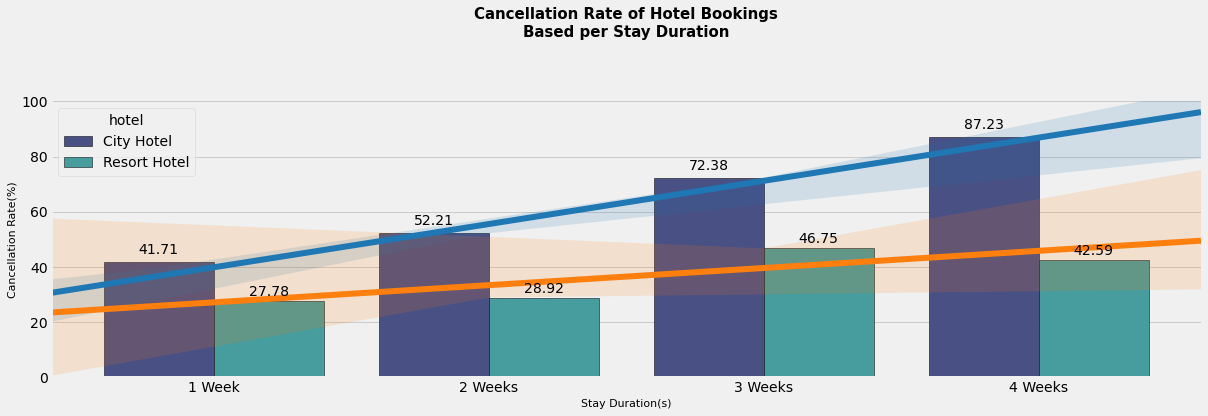

In [131]:
fig, ax = plt.subplots(figsize=(17, 6))
plt.title("Cancellation Rate of Hotel Bookings\nBased per Stay Duration", fontsize=15, color='black', weight='bold', pad=65)
sns.barplot(x='stay_duration_group', y='cancellation_rate', data=df_duration_plot, hue='hotel', edgecolor='black', palette='mako')

sns.regplot(x=np.arange(0, len(df_duration_plot[df_duration_plot['hotel'] == 'City Hotel'])), y='cancellation_rate', 
            data=df_duration_plot[df_duration_plot['hotel'] == 'City Hotel'], scatter=False, label = 'Trend City Hotel', truncate=False)
sns.regplot(x=np.arange(0, len(df_duration_plot[df_duration_plot['hotel'] == 'City Hotel'])), y='cancellation_rate', 
            data=df_duration_plot[df_duration_plot['hotel'] == 'Resort Hotel'], scatter=False, label='Trend Resort Hotel', truncate=False)

plt.xlabel('Stay Duration(s)', fontsize=11)
plt.ylabel('Cancellation Rate(%)', fontsize=11)
plt.ylim(0, 100)

plt.bar_label(ax.containers[0], padding=5)
plt.bar_label(ax.containers[1], padding=2)

sns.despine()
plt.tight_layout()
plt.savefig('cancelrate_stayduration.png', dpi=200)

- The longer customer stayed, the higher the percentage of booking being canceled\nThe most canceled hotel bookings on city hotel was on four weeks stay duration (87.23%).
- The most canceled hotel bookings on resort hotel was on three weeks stay duration (46.75%).

### C. Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

In [112]:
# unique values check

df['lead_time'].value_counts()

0      6001
1      3382
2      2042
3      1801
4      1697
       ... 
389       1
387       1
400       1
370       1
463       1
Name: lead_time, Length: 478, dtype: int64

In [114]:
# grouping the lead time

lead_time=[]
for i in df['lead_time']:
    if i <= 30:
        lead_group = '1 Month'
    elif i >= 31 and i <= 120:
        lead_group = '2-4 Months'
    elif i >= 121 and i <= 210:
        lead_group = '5-7 Months'
    elif i >= 211 and i <= 300:
        lead_group = '8-10 Months'
    elif i >= 311 and i <= 360:
        lead_group = '11-12 Months'
    else: 
        lead_group = '>12 Months'
    lead_time.append(lead_group)
df['lead_time_group'] = lead_time

In [115]:
df['lead_time_group'].value_counts()

2-4 Months      39778
1 Month         38049
5-7 Months      21560
8-10 Months     11089
>12 Months       4461
11-12 Months     3405
Name: lead_time_group, dtype: int64

In [116]:
df_lead = df.groupby(['hotel', 'lead_time_group', 'is_canceled']).agg({'agent':'count'}).reset_index()
df_lead.rename(columns={'agent':'num_booking'}, inplace=True)
df_lead

,hotel,lead_time_group,is_canceled,num_booking
0,City Hotel,1 Month,0,17816
1,City Hotel,1 Month,1,5161
2,City Hotel,11-12 Months,0,563
3,City Hotel,11-12 Months,1,1934
4,City Hotel,2-4 Months,0,16352
5,City Hotel,2-4 Months,1,11764
6,City Hotel,5-7 Months,0,7263
7,City Hotel,5-7 Months,1,7027
8,City Hotel,8-10 Months,0,2745
9,City Hotel,8-10 Months,1,4358


In [117]:
#create sum booking column
df_sum_lead = df_lead.groupby(['hotel', 'lead_time_group']).agg({'num_booking':'sum'}).reset_index()
df_sum_lead.rename(columns={'num_booking':'sum_booking'}, inplace=True)
df_lead = df_lead.merge(df_sum_lead, on=['hotel', 'lead_time_group'])


In [118]:
df_lead

,hotel,lead_time_group,is_canceled,num_booking,sum_booking
0,City Hotel,1 Month,0,17816,22977
1,City Hotel,1 Month,1,5161,22977
2,City Hotel,11-12 Months,0,563,2497
3,City Hotel,11-12 Months,1,1934,2497
4,City Hotel,2-4 Months,0,16352,28116
5,City Hotel,2-4 Months,1,11764,28116
6,City Hotel,5-7 Months,0,7263,14290
7,City Hotel,5-7 Months,1,7027,14290
8,City Hotel,8-10 Months,0,2745,7103
9,City Hotel,8-10 Months,1,4358,7103


In [120]:
#create cancellation rate
df_lead['cancellation_rate'] = round((df_lead['num_booking']/df_lead['sum_booking'])*100, 2)
df_lead

,hotel,lead_time_group,is_canceled,num_booking,sum_booking,cancellation_rate
0,City Hotel,1 Month,0,17816,22977,77.54
1,City Hotel,1 Month,1,5161,22977,22.46
2,City Hotel,11-12 Months,0,563,2497,22.55
3,City Hotel,11-12 Months,1,1934,2497,77.45
4,City Hotel,2-4 Months,0,16352,28116,58.16
5,City Hotel,2-4 Months,1,11764,28116,41.84
6,City Hotel,5-7 Months,0,7263,14290,50.83
7,City Hotel,5-7 Months,1,7027,14290,49.17
8,City Hotel,8-10 Months,0,2745,7103,38.65
9,City Hotel,8-10 Months,1,4358,7103,61.35


In [122]:
#pick the data that hotels has been cancelled
df_lead_plot = df_lead[df_lead['is_canceled']==1]
df_lead_plot

,hotel,lead_time_group,is_canceled,num_booking,sum_booking,cancellation_rate
1,City Hotel,1 Month,1,5161,22977,22.46
3,City Hotel,11-12 Months,1,1934,2497,77.45
5,City Hotel,2-4 Months,1,11764,28116,41.84
7,City Hotel,5-7 Months,1,7027,14290,49.17
9,City Hotel,8-10 Months,1,4358,7103,61.35
11,City Hotel,>12 Months,1,2738,3693,74.14
13,Resort Hotel,1 Month,1,1976,15072,13.11
15,Resort Hotel,11-12 Months,1,395,908,43.50
17,Resort Hotel,2-4 Months,1,3999,11662,34.29
19,Resort Hotel,5-7 Months,1,2685,7270,36.93


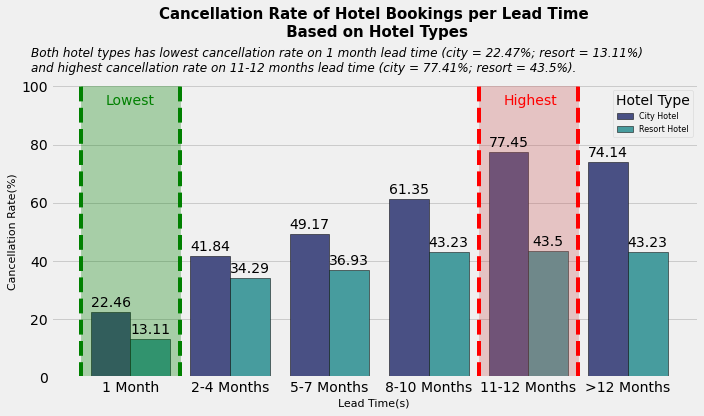

In [123]:
fig, ax = plt.subplots(figsize=(17, 6))
plt.title("Cancellation Rate of Hotel Bookings per Lead Time\n Based on Hotel Types", fontsize=15, color='black', weight='bold', pad=50)
plt.text(x=-1, y=105, s="Both hotel types has lowest cancellation rate on 1 month lead time (city = 22.46%; resort = 13.11%)\nand highest cancellation rate on 11-12 months lead time (city = 77.41%; resort = 43.5%).", fontsize=12, fontstyle='italic')
sns.barplot(x='lead_time_group', y='cancellation_rate', data=df_lead_plot, hue='hotel', order=['1 Month', '2-4 Months', '5-7 Months', '8-10 Months', '11-12 Months', '>12 Months'], edgecolor='black', palette='mako')

plt.xlabel('Lead Time(s)', fontsize=11)
plt.ylabel('Cancellation Rate(%)', fontsize=11)
plt.ylim(0, 100)

plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

plt.axvline(3.5, ls='--', color='red')
plt.axvline(4.5, ls='--', color='red')
plt.stackplot(np.arange(3.5,5.5), [[100]], color='indianred', alpha=0.3)
plt.text(x=3.75, y=95, s='Highest', fontsize=14, color='red', va='center')

plt.axvline(0.5, ls='--', color='green')
plt.axvline(-0.5, ls='--', color='green')
plt.stackplot(np.arange(-0.5,1.5), [[100]], color='green', alpha=0.3)
plt.text(x=-0.25, y=95, s='Lowest', fontsize=14, color='green', va='center')

plt.legend(title='Hotel Type', prop={'size':8}, loc=1)

sns.despine()
plt.tight_layout()
plt.savefig('cancelrate_leadtime.png', dpi=200)